In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [19]:
CLASSES = [
    "Alcantarillado", "Marca vial", "Hueco", "Parcheo", "Grietas longitudinales",
    "Grietas en forma de piel de cocodrilo", "Grietas transversales",
    "Meteorización y desprendimiento",  # "Espiras Magnéticas"
]

In [20]:
def load_multilabel_predictions():
    return np.load("todos_targets.npy"), np.load("todos_logits.npy")

In [21]:
targets, logits = load_multilabel_predictions()

In [22]:
umbral = 0.5

In [23]:
logits_thresholded = (logits > umbral).astype(np.uint8)
avg = "micro"
res = {"Clase": [], "Accuracy": [], "Recall": [], "Precision": [], "F1": []}
for indx, clase in enumerate(CLASSES):
    pr = precision_score(targets[:, indx], logits_thresholded[:, indx], average=avg)
    re = recall_score(targets[:, indx], logits_thresholded[:, indx], average=avg)
    f1 = f1_score(targets[:, indx], logits_thresholded[:, indx], average=avg)
    acc = accuracy_score(targets[:, indx], logits_thresholded[:, indx])
    res["Clase"].append(clase)
    res["Accuracy"].append(acc)
    res["Recall"].append(re)
    res["Precision"].append(pr)
    res["F1"].append(f1)

In [33]:
y = targets.ravel()
scores = logits.ravel()
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

In [34]:
thresholds

array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 2.7637820e-05,
       2.7550086e-05, 6.2112093e-07], dtype=float32)

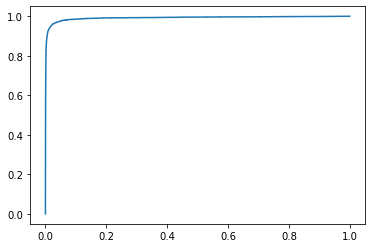

In [35]:
plt.plot(fpr, tpr)

In [36]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [57]:
desired_fpr = 0.005

item_index = min(range(len(fpr)), key=lambda i: abs(fpr[i]-desired_fpr))
item = fpr[item_index]
print(f"item at: {item_index}\nwith fpr value : {item}")
print(f"with tpr value : {tpr[item_index]}")
print(f"using th : {thresholds[item_index]}")

item at: 2039
with fpr value : 0.004996904572388786
with tpr value : 0.8929656461790138
using th : 0.8301677703857422
